In [21]:

import matplotlib.pyplot as plt
import sys
import numpy as np
import os
from numpy import genfromtxt
# Load measurements
anC3 = genfromtxt("resultsAnC3.csv", delimiter=',')[1:]
anC4 = genfromtxt("resultsAnC4.csv", delimiter=',')[1:]
variables = genfromtxt("variables.csv", delimiter=',')[1:]
variables[0] *=1e6
variables[2] *=1e6

In [22]:
variables

array([[  1., 101., 201., 301., 401., 501., 601., 701., 801., 901.,  nan,
         nan,  nan],
       [-10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,
         45.,  50.],
       [  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,  nan,
         nan,  nan]])

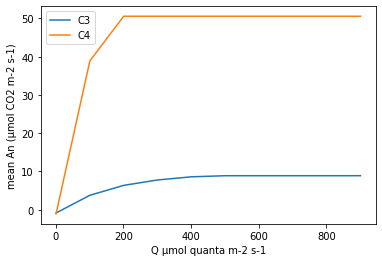

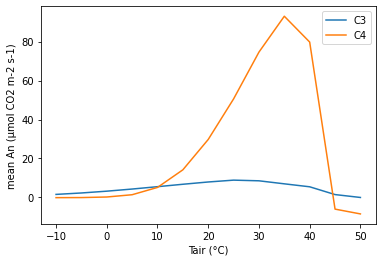

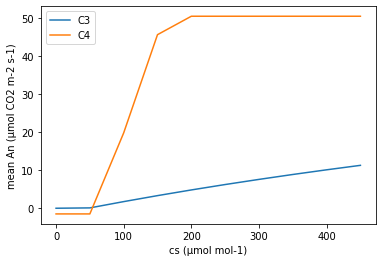

In [24]:
names= ['Q μmol quanta m-2 s-1','Tair (°C)','cs (μmol mol-1)']
for i in range(len(variables)):
    var = variables[i]
    
    plt.plot(var, anC3[i], label = "C3")
    plt.plot(var, anC4[i], label = "C4")
    plt.legend()
    plt.ylabel('mean An (μmol CO2 m-2 s-1)')
    plt.xlabel(names[i])
    plt.show()

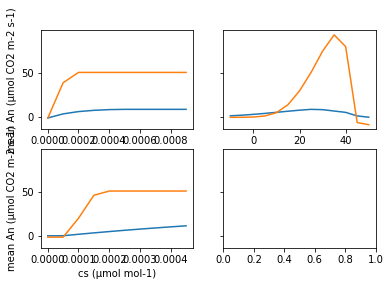

In [13]:
fig, axs = plt.subplots(2, 2, sharey = True)
axs[0, 0].plot(variables[1], anC3[1], label = "C3")
axs[0, 0].plot(variables[1], anC4[1], label = "C4")
axs[0, 0].set(xlabel = 'Q μmol quanta m-2 s-1', ylabel = 'mean An (μmol CO2 m-2 s-1)')
axs[0, 1].plot(variables[2], anC3[2], label = "C3")
axs[0, 1].plot(variables[2], anC4[2], label = "C4")
axs[0, 1].set(xlabel = 'Tair (°C)')
axs[1, 0].plot(variables[3], anC3[3], label = "C3")
axs[1, 0].plot(variables[3], anC4[3], label = "C4")
axs[1, 0].set(xlabel = 'cs (μmol mol-1)', ylabel = 'mean An (μmol CO2 m-2 s-1)')

plt.show()

In [ ]:
names= ['Q μmol quanta m-2 s-1','Tair (°C)','cs (μmol mol-1)']
from plotnine import options
dfmean = pd.DataFrame(data=anC3[i],columns=["C3"])
dfmean["C4"] = anC4[i]
dfmean[names[i]] = variables[i]
options.figure_size = (35, 15)
(
    ggplot(dfmean)  # What data to use
    + aes(x='variable', y= "C3",  fill="orange" )  # What variable to use
    + aes(x='variable', y= "C4",  fill="blue" )  # What variable to use
    + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
    + xlab(names[i])
    + ylim(0,55)
    + facet_wrap("variable", scales = "free")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
    + ylab("total Sobol sensitivity")
    + scale_fill_manual(name="",
                     values = ["#FC8D62","#8DA0CB"])
     + geom_hline(aes(yintercept=0.25))

    +theme(legend_text = element_text( size=25),
        legend_title = element_text( size=25),
        panel_border = element_rect(color = "black", fill = "white", size = 1), 
        legend_position= [0.5,-0.1],
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill="white", color="black"),
        strip_text_y =element_text( size=25) ,
        axis_text_x =element_text(angle = 90, size=20) ,
        axis_text = element_text( size=20),
        axis_title = element_text( size=25),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 25, hjust = 0,face ="bold")) 
)